In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error , make_scorer
from scipy.stats import skew , norm
import scipy.stats
import warnings
import sys
warnings.filterwarnings('ignore')
%matplotlib inline
np.set_printoptions(precision=2)

In [2]:
# matplotlib configuration
plt.rcParams['figure.dpi'] = 100

In [3]:
#loading data
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# .info()
We can gain a lot of information with this command like number of columns, Data types, Column names and etcetera

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

SalePrice is the reason of our quest, so we have to know more about it.

In [7]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

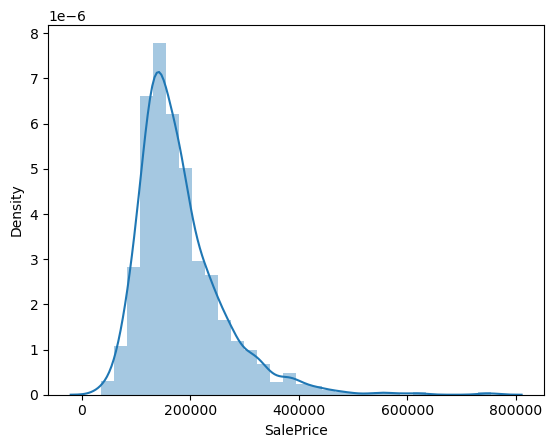

In [8]:
sns.distplot(df['SalePrice'],bins = 30)
plt.show()

In [9]:
skew(df['SalePrice'])

1.880940746034036

### Relationships

In order to know SalePrice further, we have to survey its relations with our features.

We start with some numerical features that I think they are important for determine the house price.
###### 1. numerical features

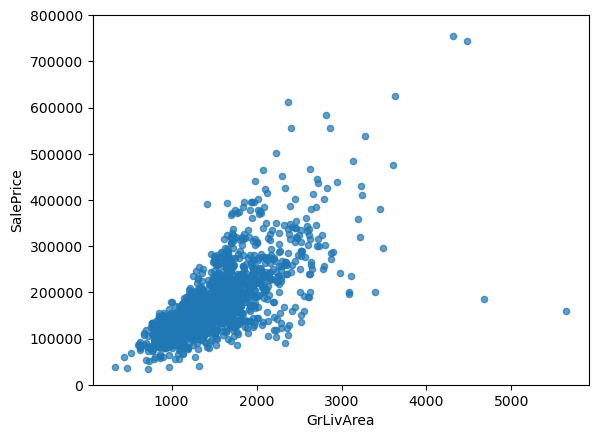

In [10]:
df.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000) , alpha = 0.7);

As you see, GrLivArea and SalePrice have linear relationship.

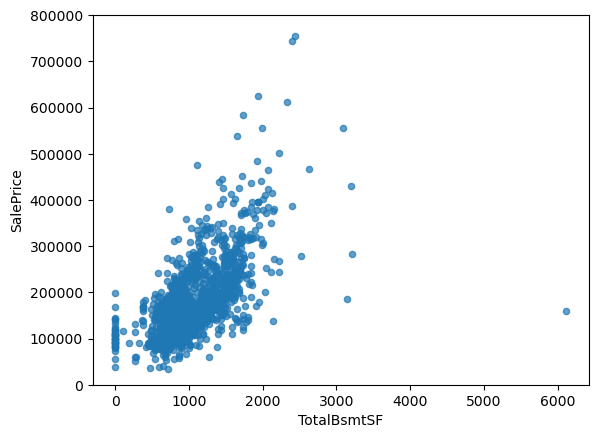

In [11]:
df.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000) , alpha = 0.7);

'TotalBsmtSF' is also a great friend of 'SalePrice' but this seems a much more emotional relationship! Everything is ok and suddenly, in a strong linear (exponential?) reaction, everything changes. Moreover, it's clear that sometimes 'TotalBsmtSF' closes in itself and gives zero credit to 'SalePrice'.

###### 2. categorical features

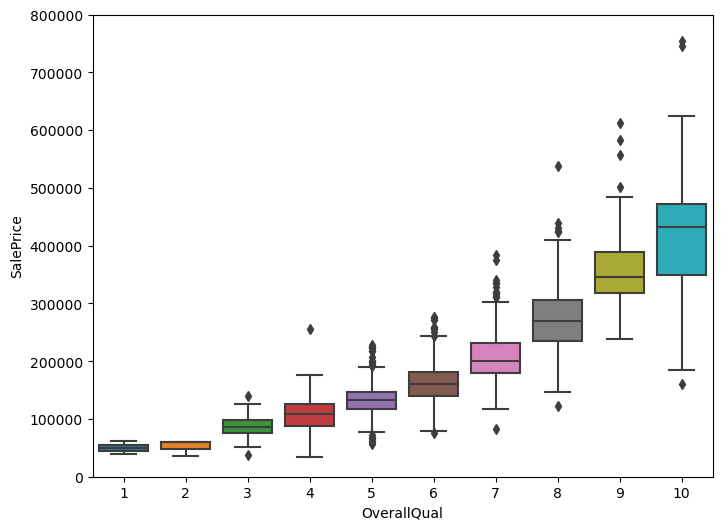

In [12]:
#box plot overallqual/saleprice
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=df)
fig.axis(ymin=0, ymax=800000);

It's clear that OverallQual has a strong connection with the SalePrice.

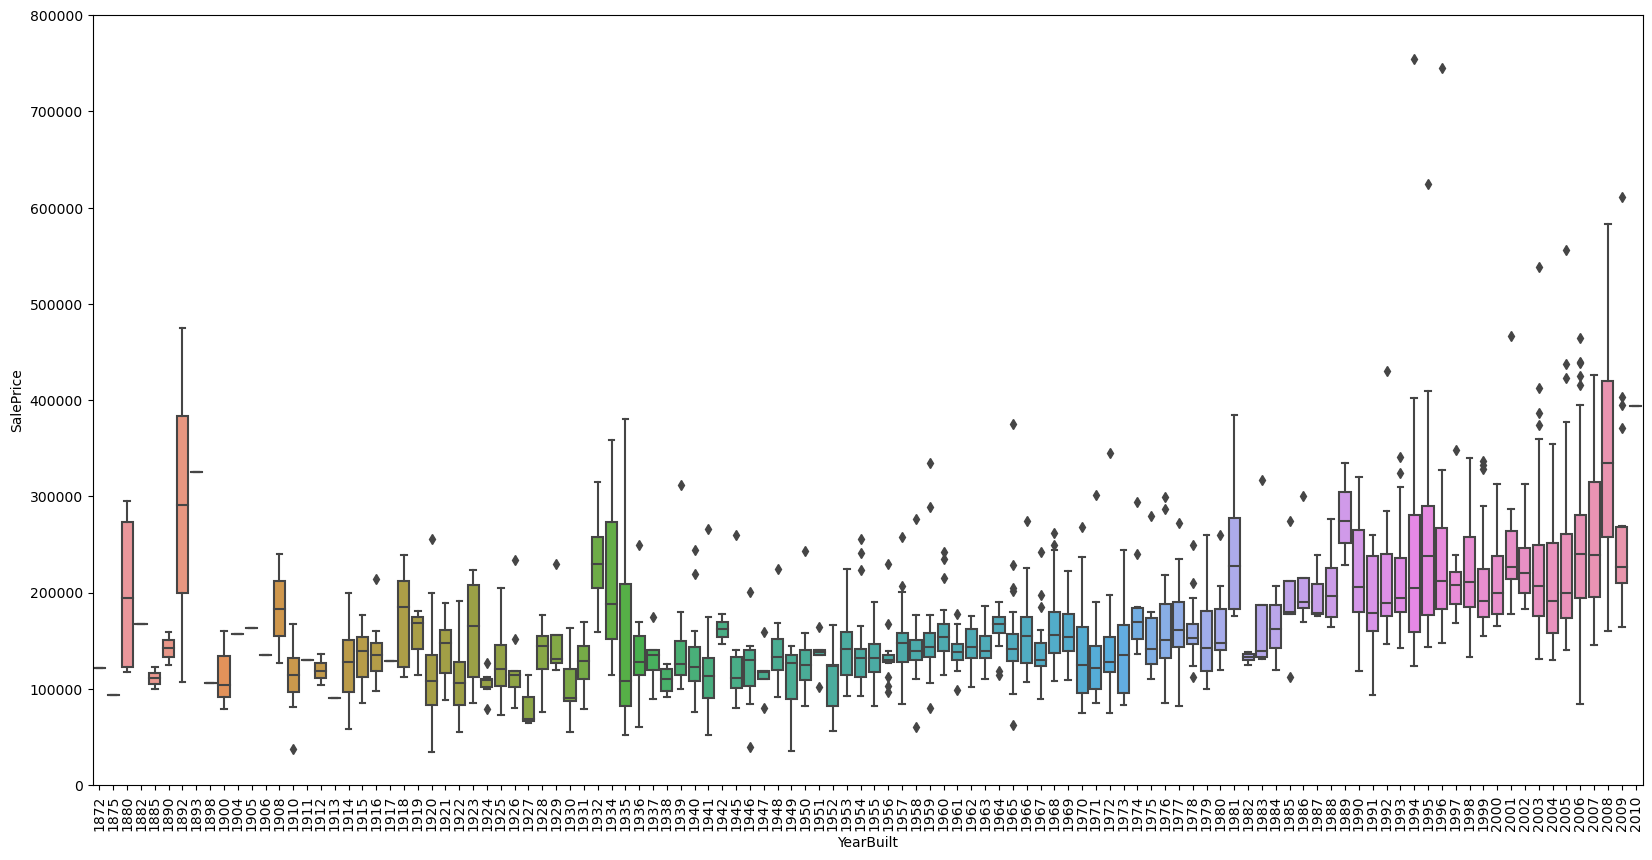

In [13]:
#box plot overallqual/saleprice
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=df)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90)
plt.show()

Although it's not a strong tendency, I'd say that 'SalePrice' is more prone to spend more money in new stuff than in old relics.

### correlation matrix with heatmap

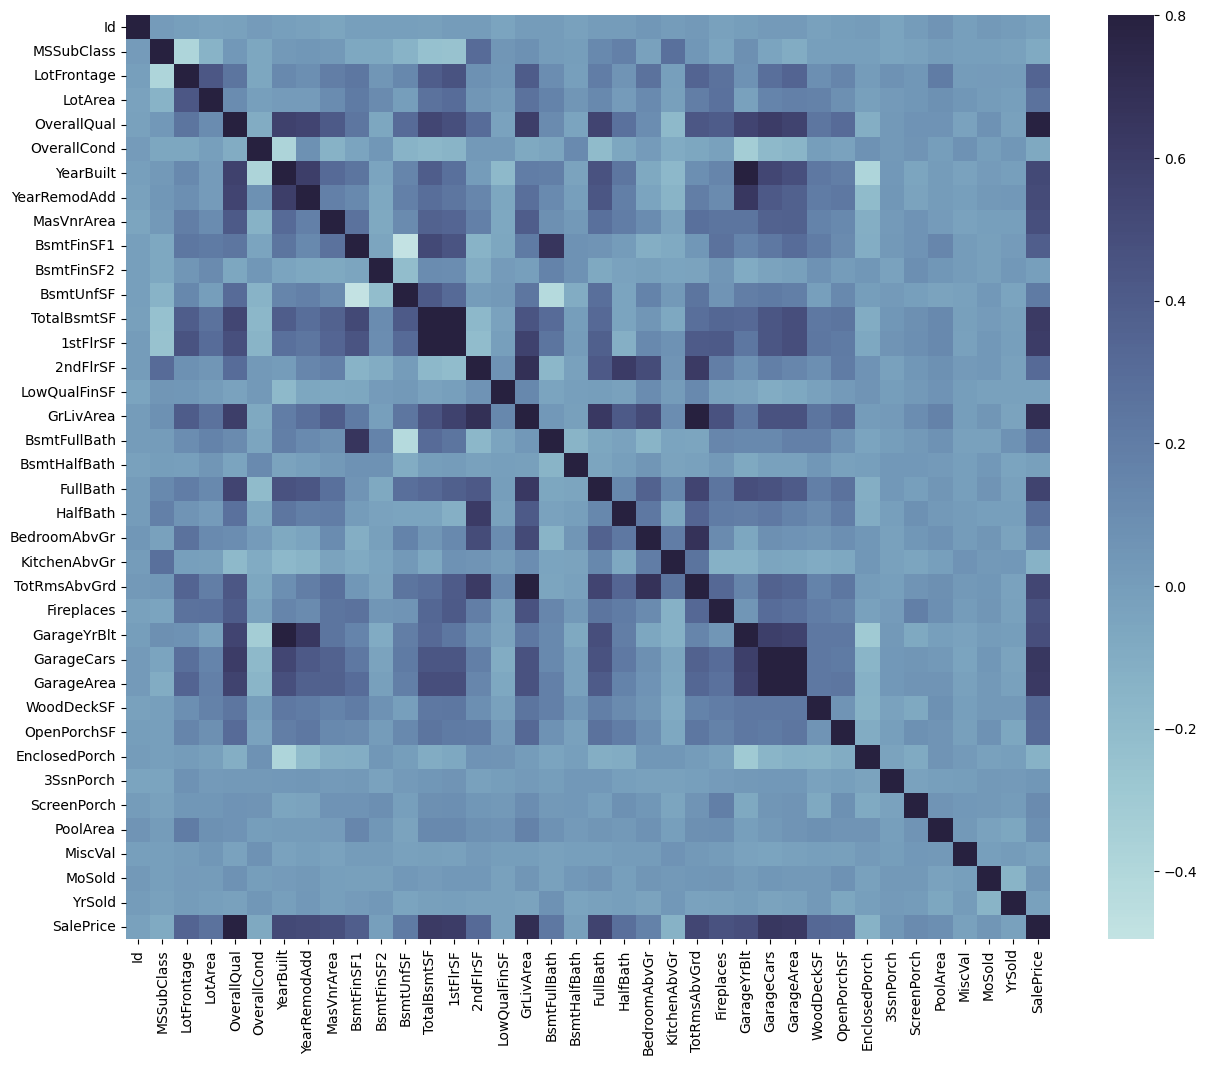

In [14]:
correlation = df.corr(numeric_only = True)
f , ax = plt.subplots(figsize = (15 , 12))
cmm = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.heatmap(correlation,square= True , vmax = 0.8 ,cmap =cmm)
plt.show()

In my opinion, this heatmap is the best way to get a quick overview of relationships.

At first sight, there are two squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

#### Zoomed heatmap
Here's a closer look at the features most correlated with 'SalePrice'.

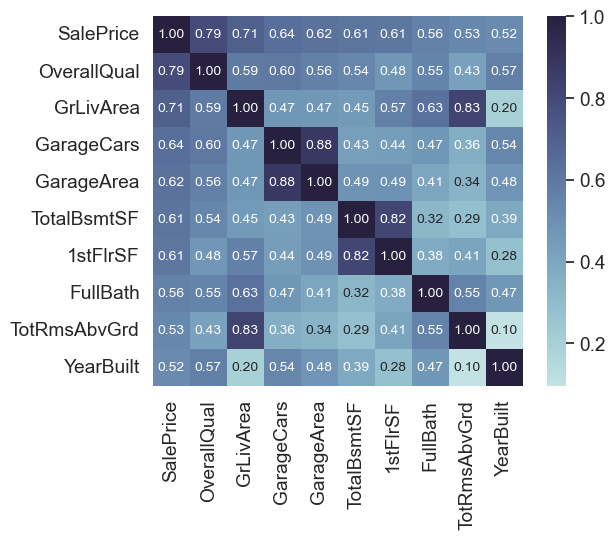

In [15]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap =cmm)
plt.show()

### Summary
1. **Strong Correlations:**
   - The features 'OverallQual', 'GrLivArea', and 'TotalBsmtSF' exhibit strong positive correlations with the 'SalePrice'. These variables are important indicators of a property's value.

2. **Garage Variables:**
   - Both 'GarageCars' and 'GarageArea' are highly correlated with the 'SalePrice'. However, they are closely related to each other. 'GarageCars' represents the number of cars a garage can accommodate, while 'GarageArea' measures the actual area of the garage. Since they are like twin brothers, we can retain only one of them for our analysis. Considering its higher correlation, let's keep 'GarageCars'.

3. **Basement and First Floor:**
   - 'TotalBsmtSF' (total basement square footage) and '1stFloor' area also appear to be closely related. We can maintain 'TotalBsmtSF' to validate our initial assumption (as discussed in the section 'So... What can we expect?').

4. **Full Bathrooms:**
   - Surprisingly, the number of full bathrooms ('FullBath') seems to impact the sale price. It's worth investigating further.

5. **Rooms Above Grade:**
   - 'TotRmsAbvGrd' (total rooms above grade) and 'GrLivArea' (above-ground living area) exhibit a strong correlation. Perhaps this dataset was collected near Chernobyl, given the similarity between these variables!

6. **Year of Construction:**
   - 'YearBuilt' shows a slight correlation with the 'SalePrice'. However, delving into time-series analysis might be necessary to fully understand its impact. Consider this as a homework assignment.


### Scatter plots between 'SalePrice' and correlated variables
So much information in so short space

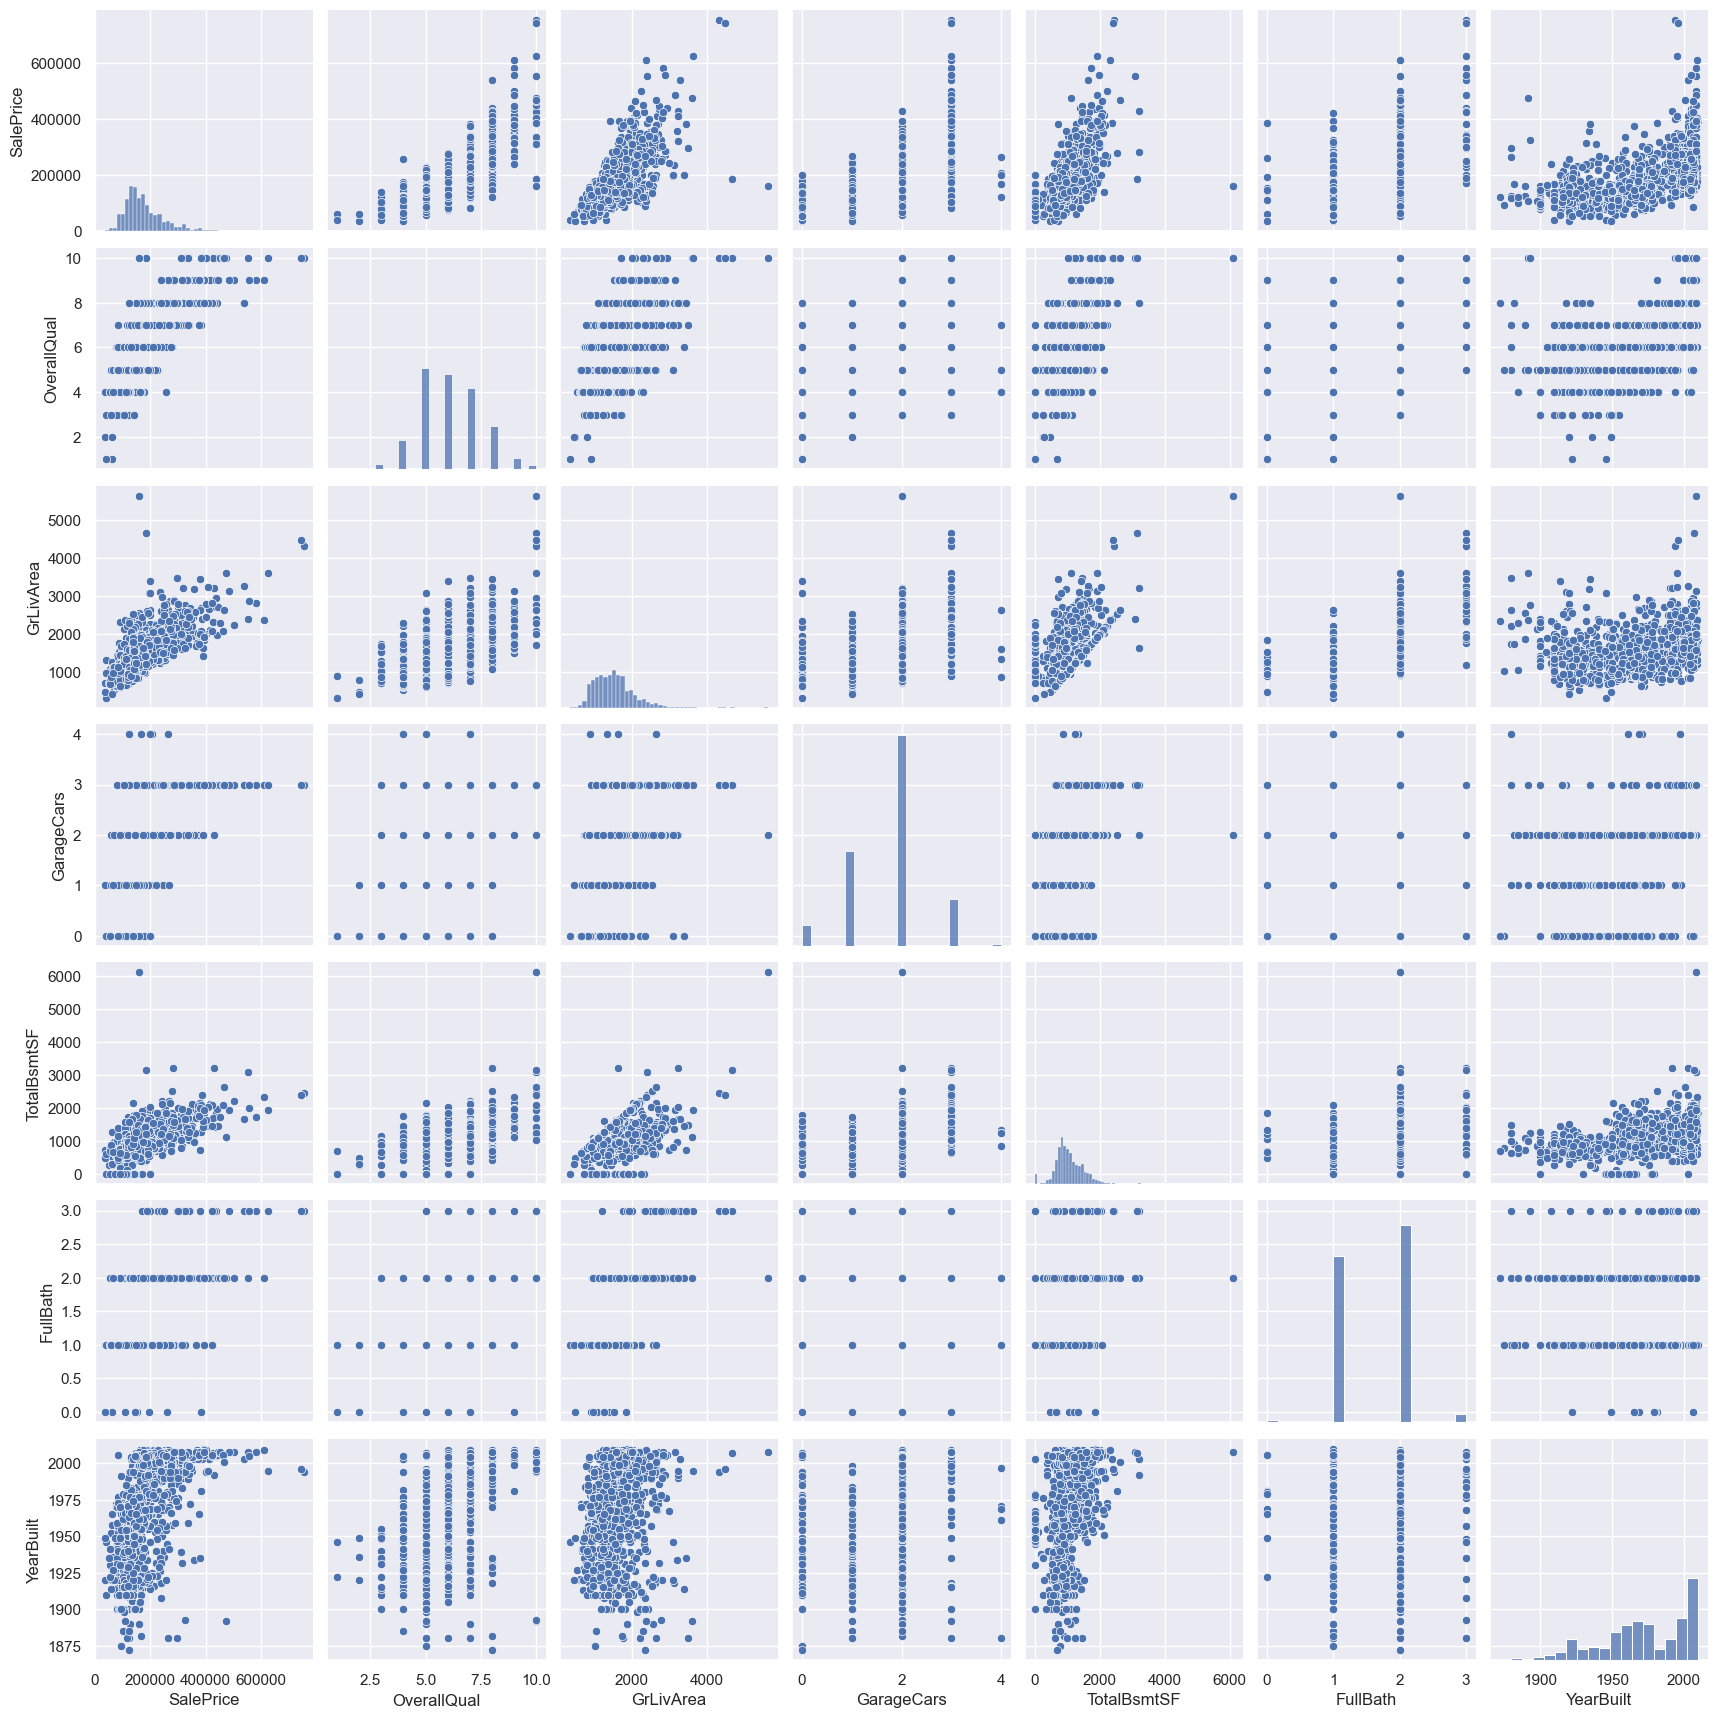

In [16]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

**Exploring Variable Relationships in the Mega Scatter Plot**

While we have already examined some key figures, this comprehensive scatter plot provides valuable insights into the relationships between variables.

1. **'TotalBsmtSF' vs. 'GrLivArea':**
   - Notably, the scatter plot between 'TotalBsmtSF' (total basement square footage) and 'GrLivArea' (above-ground living area) reveals an interesting pattern. The data points form a nearly linear boundary, suggesting that basement areas are typically smaller than or equal to the above-ground living areas. Unusually large basements (beyond the boundary) might be exceptions, perhaps reserved for unique purposes like bunkers.

2. **'SalePrice' and 'YearBuilt':**
   - The scatter plot for 'SalePrice' against 'YearBuilt' prompts further reflection. At the lower end of the data cloud, we observe what resembles a subtle exponential curve (let your creativity flow). Similarly, the upper limit of the cloud exhibits a similar trend (be even more imaginative). Additionally, note how recent years' data points tend to stay above this trend line, indicating accelerated price increases in recent times.


### Missing Data

In [17]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


**Handling Missing Data: A Professional Approach**

When dealing with missing data, it's essential to adopt a systematic strategy. Here are the steps we'll take:

1. **Threshold for Deletion**: We'll consider variables with more than 15% missing data as candidates for removal. These variables include 'PoolQC', 'MiscFeature', and 'Alley'. Since these features are not critical factors in house buying decisions, their absence won't significantly impact our analysis.

2. **Outliers and Garage Variables**: Variables like 'PoolQC', 'MiscFeature', and 'FireplaceQu' exhibit strong outlier potential. Therefore, we'll confidently remove them. As for 'GarageX' variables (which share the same missing data pattern), we'll delete them too. Given that 'GarageCars' provides crucial garage-related information, the loss of 5% data from 'GarageX' variables is acceptable.

3. **Basement Variables**: Similar logic applies to 'BsmtX' variables. We'll delete them, assuming the missing data pertains to the same set of observations.

4. **Non-Essential Variables**: 'MasVnrArea' and 'MasVnrType' lack essential significance. Their correlation with 'YearBuilt' and 'OverallQual' is already captured. Hence, we'll remove them without losing valuable insights.

5. **Electrical Variable**: With only one missing observation in 'Electrical', we'll delete that specific data point while retaining the variable.

In summary, our approach involves deleting variables with missing data, except for 'Electrical', where we'll remove the single missing observation.

In [17]:
(missing_data[missing_data['Total'] > 1]).index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType',
       'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea'],
      dtype='object')

In [18]:
df.loc[df['Electrical'].isnull()].index

Index([1379], dtype='int64')

In [19]:
#dealing with missing data
df = df.drop((missing_data[missing_data['Total'] > 1]).index,axis = 1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max() #just checking that there's no missing data missing...

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   int64 
 2   MSZoning       1459 non-null   object
 3   LotArea        1459 non-null   int64 
 4   Street         1459 non-null   object
 5   LotShape       1459 non-null   object
 6   LandContour    1459 non-null   object
 7   Utilities      1459 non-null   object
 8   LotConfig      1459 non-null   object
 9   LandSlope      1459 non-null   object
 10  Neighborhood   1459 non-null   object
 11  Condition1     1459 non-null   object
 12  Condition2     1459 non-null   object
 13  BldgType       1459 non-null   object
 14  HouseStyle     1459 non-null   object
 15  OverallQual    1459 non-null   int64 
 16  OverallCond    1459 non-null   int64 
 17  YearBuilt      1459 non-null   int64 
 18  YearRemodAdd   1459 non-null   in

### ِDuplicade

In [21]:
df.duplicated().sum()

0

There are no duplicates in this dataset.

### Outliars


###### Univariate analysis

In [22]:
#standardizing data
yArray = np.asanyarray(df['SalePrice'])
saleprice_scaled = StandardScaler().fit_transform(yArray[:,None]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.

###### Bivariate analysis

We already know the following scatter plots by heart. However, when we look to things from a new perspective, there's always something to discover.

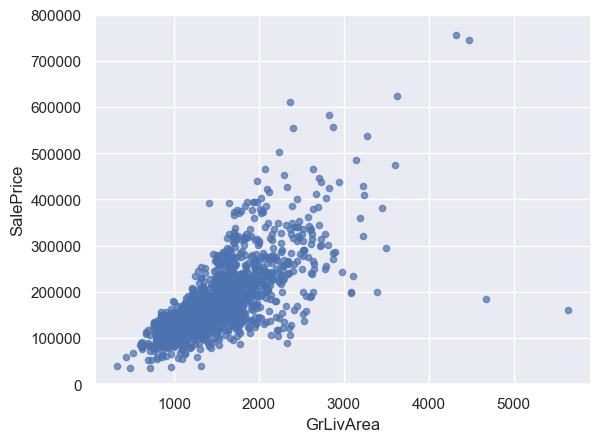

In [23]:
#bivariate analysis saleprice/grlivarea
df.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000) , alpha = 0.7);

The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [24]:
df.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [25]:
#deleting points
df = df.drop(df[df['Id'] == 1299].index)
df = df.drop(df[df['Id'] == 524].index)

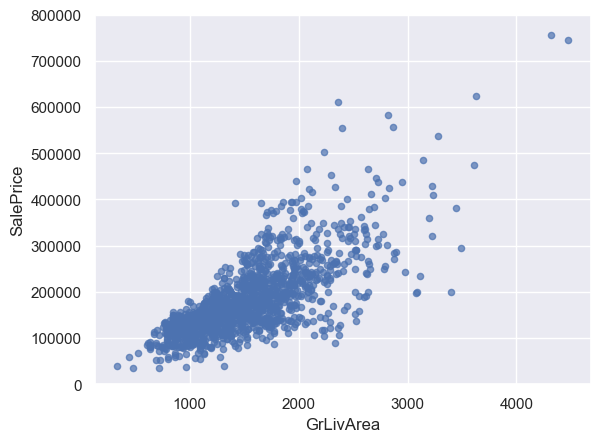

In [26]:
df.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000) , alpha = 0.7);

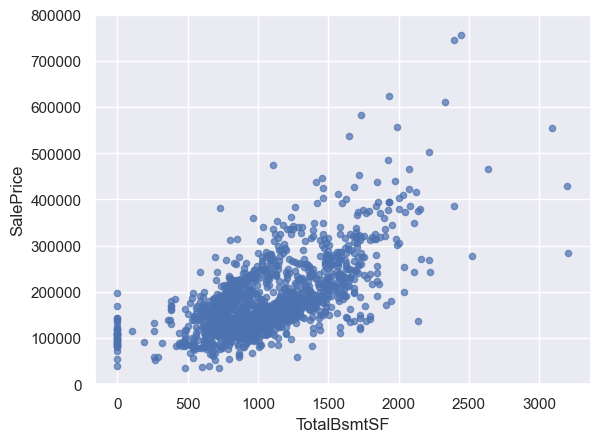

In [27]:
#bivariate analysis saleprice/grlivarea
df.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000) , alpha = 0.7);

We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

### Normalize and Scale

Both log transformation and standardization serve different purposes in data preprocessing. Let's break down why both methods are used:

1. **Log Transformation**:
    - **Purpose**: Log transformation is commonly applied to skewed data distributions. It reduces the impact of extreme values (outliers) and makes the distribution more symmetric.
    - **How It Works**: For each feature, the logarithm of the original value is taken (e.g., `np.log1p(x)`). This compresses large values and expands small values.
    - **Use Case**: Log transformation is useful when dealing with features that have a wide range of values or when the data distribution is skewed.
    - **Example**: If you have a feature like income, where some values are very high (e.g., CEOs' salaries) and others are low (e.g., entry-level salaries), log transformation can help normalize the distribution.

2. **Standardization (StandardScaler)**:
    - **Purpose**: Standardization scales features to have zero mean and unit variance. It ensures that all features contribute equally during model training.
    - **How It Works**: Each feature column is transformed to have a mean of 0 and a standard deviation of 1. The formula for standardization is:
        $$ f'_{i} = \frac{f_{i} - \text{mean}(f_{i})}{\text{std}(f_{i})} $$
    - **Use Case**: Standardization is essential for algorithms that rely on distance metrics (e.g., k-means clustering, support vector machines) or gradient-based optimization (e.g., neural networks).
    - **Example**: If you have features with different units (e.g., height, age, income), standardization ensures they are on a comparable scale.

3. **When to Use Each**:
    - Log transformation is typically applied first to handle skewness and outliers. Afterward, standardization can be used to ensure consistent scaling across features.
    - Some algorithms (e.g., tree-based models like Random Forest, XGBoost, and Gradient Boosting) do not require standardization. However, it's still common to apply it for consistency and visualization purposes.
    - In summary, use log transformation for skewed data and standardization for consistent scaling.

First we need to abstract numeric data from categorical data.

In [28]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = df.select_dtypes(include = ["object"]).columns
numerical_features = df.select_dtypes(exclude = ["object"]).columns
#We use Log Transformation for SalePrice before
numerical_features = numerical_features.drop(["SalePrice","Id",'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF'])
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = df[numerical_features]
train_cat = df[categorical_features]

Numerical features : 29
Categorical features : 28


###### Log Transformation

In [29]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = train_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
train_num[skewed_features] = np.log1p(train_num[skewed_features])
print(skewed_features)

22 skewed numerical features to log transform
Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')


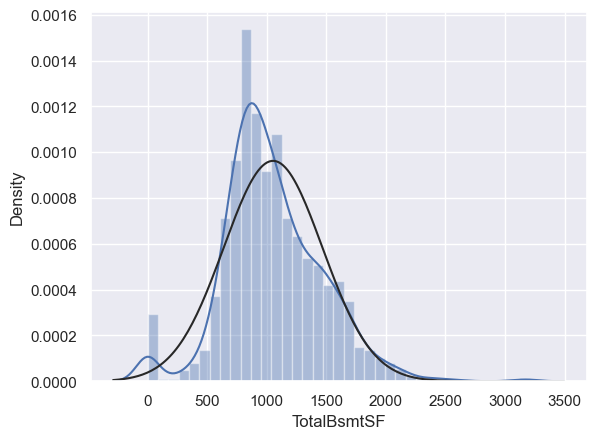

<Figure size 640x480 with 0 Axes>

In [30]:
#histogram and normal probability plot
sns.distplot(df['TotalBsmtSF'], fit=norm);
fig = plt.figure()

Ok, now we are dealing with the big boss. What do we have here?

Something that, in general, presents skewness.
A significant number of observations with value zero (houses without basement).
A big problem because the value zero doesn't allow us to do log transformations.
To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

I'm not sure if this approach is correct. It just seemed right to me. That's what I call 'high risk engineering'.

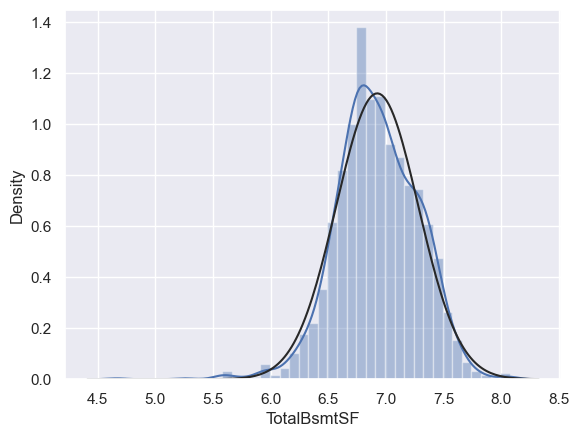

In [31]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df['HasBsmt'] = pd.Series(len(df['TotalBsmtSF']), index=df.index)
df['HasBsmt'] = 0 
df.loc[df['TotalBsmtSF']>0,'HasBsmt'] = 1
#transform data
df.loc[df['HasBsmt']==1,'TotalBsmtSF'] = np.log1p(df['TotalBsmtSF'])
#histogram and normal probability plot
sns.distplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);

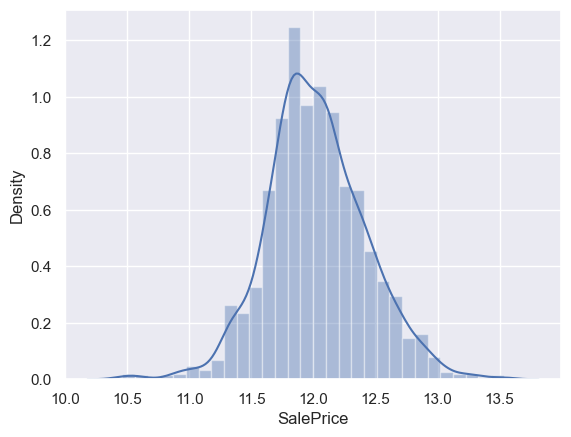

In [32]:
# when skewness is more than zero we can normilze with log
# log1p = log(1+x)
y = np.log1p(df.SalePrice)
sns.distplot(y,bins = 30)
plt.show()

**Considerations**:
   - Choose the appropriate method based on the nature of your categorical data:
     - If the categories have no inherent order, use `pd.get_dummies()`.
     - If the categories have a meaningful order, use `LabelEncoder`.
   - Be cautious when using `LabelEncoder` with non-ordinal features, as it may introduce unintended ordinal relationships.


In [33]:
# Create dummy features for categorical values via one-hot encoding
train_cat = pd.get_dummies(train_cat)
train_cat.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,True,False,False,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False


In [34]:
# Join categorical and numerical features
train = pd.concat([train_num, train_cat,df['TotalBsmtSF']], axis = 1)
print("New number of features : " + str(train.shape[1]))

# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.4, random_state = 35)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

New number of features : 216
X_train : (874, 216)
X_test : (583, 216)
y_train : (874,)
y_test : (583,)


###### Standardization

Standardization cannot be done before  the partitioning, as we don't want to fit the StandardScaler on some observations that will later be used in the test set.
We should fit our scaler using only `X_train`.

In [35]:
Scale = StandardScaler()
X_train.loc[:, numerical_features] = Scale.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = Scale.transform(X_test.loc[:, numerical_features])

### Define Error method

In [36]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

### Modeling
**1* Linear Regression without regularization**

RMSE on Training set : 2418154440.959205
RMSE on Test set : 9484438983.833572
MSE on Training set : 0.008190811218309276
MSE on Training set : 1.225276517474442e+18


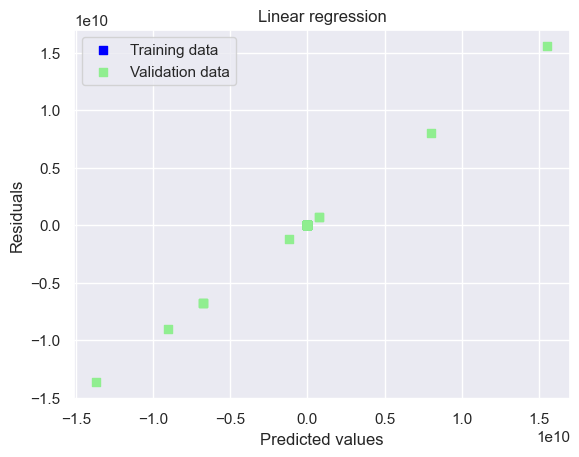

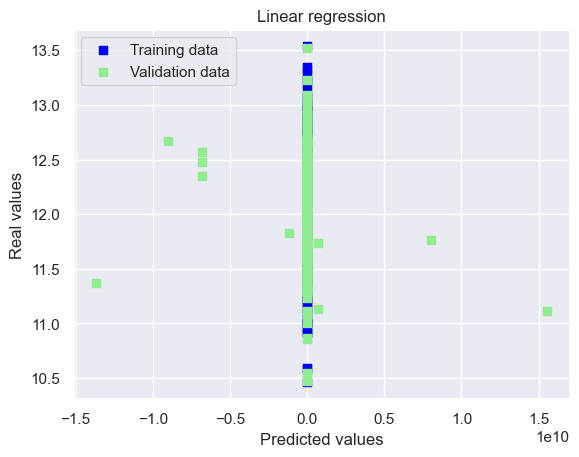

In [37]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print("MSE on Training set :", mean_squared_error(y_train,y_train_pred))
print("MSE on Training set :", mean_squared_error(y_test,y_test_pred))

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

In [38]:
vsTrain = pd.DataFrame({"Y":y_train, "Y_Predict":y_train_pred})
vsTrain

,Y,Y_Predict
833,12.025755,12.025909
400,12.411056,12.447235
162,12.301387,12.394257
304,12.594734,12.573761
1411,11.849405,11.906616
...,...,...
960,11.665655,11.698181
1005,11.917730,11.844421
1058,12.721889,12.739899
952,11.804856,11.765320


In [39]:
vsTest = pd.DataFrame({"Y":y_test, "Y_Predict":y_test_pred})
vsTest

,Y,Y_Predict
592,11.835016,11.813080
543,11.798112,11.820251
642,12.751303,12.707672
1138,12.185875,12.256836
993,12.066241,12.139099
...,...,...
228,11.736077,11.523468
198,11.552156,11.710999
466,12.025755,12.065033
884,11.512935,11.535095


RMSE shows up weird here for some reason. 
also we have overfitting so we will try regularization.

<Axes: xlabel='Y', ylabel='Y_Predict'>

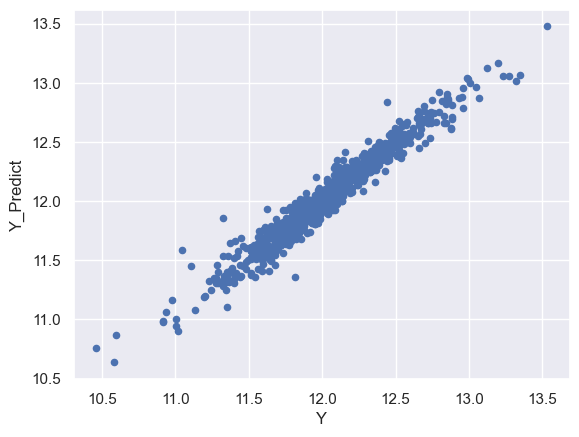

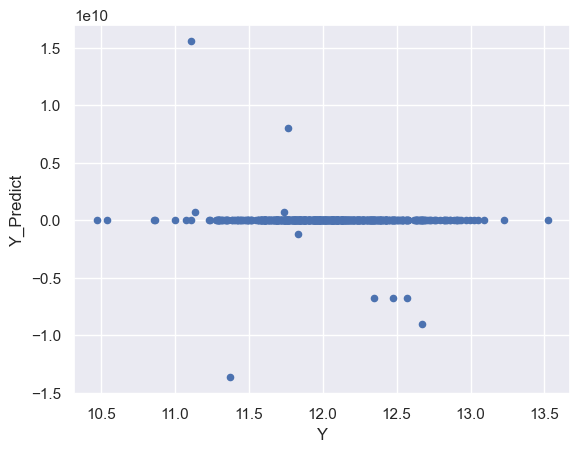

In [51]:
vsTrain.plot.scatter(x = "Y", y = "Y_Predict")
vsTest.plot.scatter(x = "Y", y = "Y_Predict")

Most of Y_Predict are Zero but I couldn't understand what problem is.
But when we print it there is no zero values????

In [50]:
arr=np.array(vsTest.Y_Predict)
formatted_arr = [format(num, '.2f') for num in arr]
print(formatted_arr)

['11.81', '11.82', '12.71', '12.26', '12.14', '12.48', '11.88', '12.12', '12.03', '-6781337986.00', '12.05', '11.15', '12.29', '12.67', '11.55', '12.57', '8020835345.09', '12.26', '11.68', '11.99', '-6781337986.26', '12.15', '12.35', '11.69', '10.87', '12.37', '11.84', '12.02', '11.69', '12.11', '12.19', '11.85', '11.80', '11.79', '11.99', '11.82', '11.85', '12.10', '11.71', '12.03', '12.40', '12.24', '12.70', '12.35', '11.76', '11.96', '12.09', '12.29', '11.48', '11.94', '12.49', '12.10', '12.92', '11.60', '12.09', '12.61', '12.55', '12.23', '12.67', '12.15', '11.49', '11.88', '12.15', '11.82', '11.61', '12.38', '11.88', '12.15', '12.17', '12.21', '11.91', '12.36', '11.93', '12.27', '12.43', '12.28', '12.28', '11.82', '11.82', '12.32', '11.78', '12.18', '12.20', '12.03', '11.65', '12.61', '12.24', '12.16', '11.78', '11.35', '12.61', '12.10', '11.34', '11.66', '12.14', '12.17', '717297442.00', '11.55', '12.16', '11.76', '11.81', '12.49', '12.25', '11.54', '11.99', '11.51', '12.48', '15


# Linear Regression with Ridge Regularization (L2 penalty)

In machine learning, regularization techniques play a crucial role in handling collinearity, reducing noise in data, and preventing overfitting. One such technique is Ridge regression, which introduces additional information (bias) to penalize extreme parameter weights.

## The Concept of Ridge Regression

Ridge regression is an L2 penalized model. It extends ordinary linear regression by adding a regularization term to the cost function. The regularization term is the squared sum of the model's weights. By doing so, Ridge regression encourages the model to find a balance between fitting the training data well and keeping the weights small.

### Cost Function for Ridge Regression

The cost function for Ridge regression is given by:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \lambda \sum_{j=1}^{n} \theta_j^2
$$

where:
- \(m\) is the number of training examples.
- \(h_\theta(x^{(i)})\) represents the predicted value for the \(i\)-th example.
- \(y^{(i)}\) is the actual target value for the \(i\)-th example.
- \(\theta_j\) are the model's weights (parameters).
- \(n\) is the number of features.
- \(\lambda\) (lambda) is the regularization parameter (hyperparameter) that controls the strength of the penalty term.

### Key Points

1. Ridge regression helps prevent overfitting by discouraging large weight values.
2. The regularization term adds a penalty to the cost function based on the sum of squared weights.
3. The choice of \(\lambda\) determines the trade-off between fitting the data and regularization.

Remember to adjust the value of \(\lambda\) based on cross-validation to find the optimal balance for your specific problem.


Best alpha : 10.0
Try again for more precision with alphas centered around 10.0
Best alpha : 8.0
Ridge RMSE on Training set : 0.11822087988003135
Ridge RMSE on Test set : 0.1139258830863463


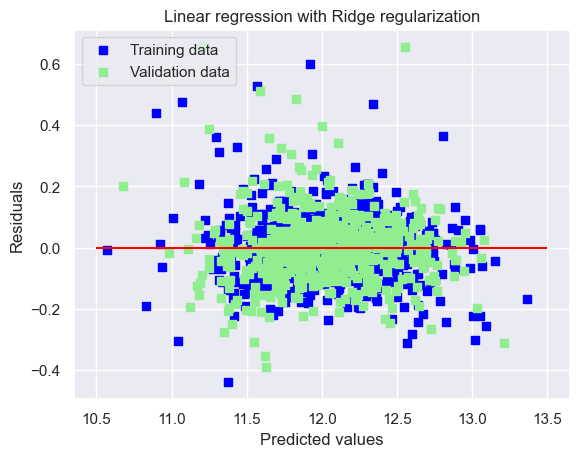

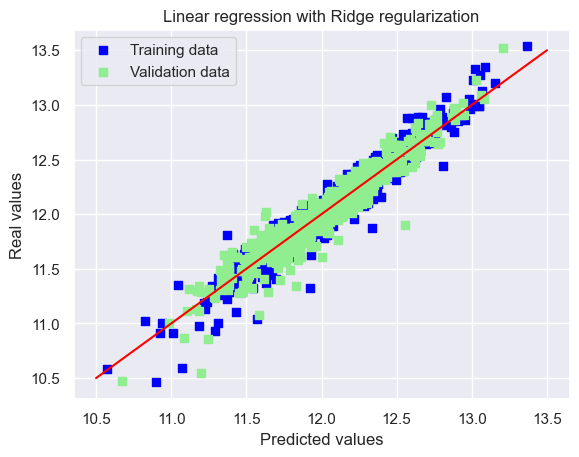

Ridge picked 207 features and eliminated the other 9 features


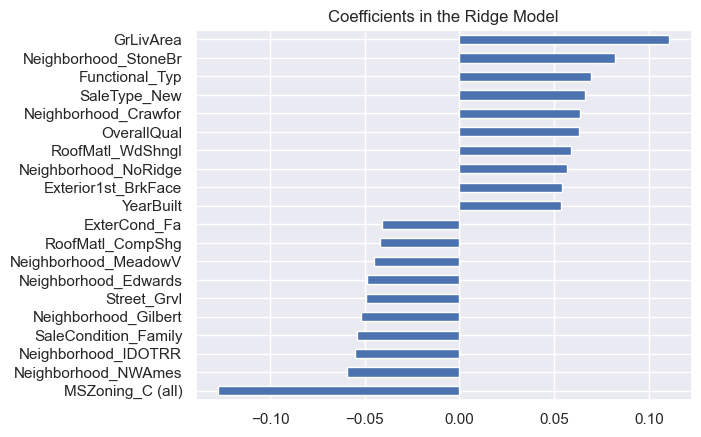

In [54]:
# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

We're getting a much better RMSE result now that we've added regularization. The very small difference between training and test results indicate that we eliminated most of the overfitting. Visually, the graphs seem to confirm that idea.  

Ridge used almost all of the existing features.

# Linear Regression with Lasso Regularization (L1 penalty)

In machine learning, regularization techniques play a crucial role in improving model performance by preventing overfitting and handling collinearity. One such technique is Lasso regularization, which stands for **Least Absolute Shrinkage and Selection Operator**.

## The Concept of Lasso Regularization

Lasso regularization extends ordinary linear regression by adding an L1 penalty term to the cost function. Unlike Ridge regression (which uses an L2 penalty), Lasso replaces the squared sum of the weights with the sum of the absolute values of the weights. This modification encourages sparsity in the feature vectors, meaning that most feature weights will be driven to zero.

### Key Points about Lasso Regularization

1. **Sparsity and Feature Selection:**
   - Lasso regularization is particularly useful when dealing with high-dimensional datasets containing many features.
   - By promoting sparsity, Lasso helps identify and select relevant features while discarding irrelevant ones.
   - Sparse feature vectors are easier to interpret and can lead to more efficient models.

2. **Cost Function for Lasso Regression:**
   - The cost function for Lasso regression is given by:

     $$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \lambda \sum_{j=1}^{n} |\theta_j| $$

     where:
     - \(m\) is the number of training examples.
     - \(h_\theta(x^{(i)})\) represents the predicted value for the \(i\)-th example.
     - \(y^{(i)}\) is the actual target value for the \(i\)-th example.
     - \(\theta_j\) are the model's weights (parameters).
     - \(n\) is the number of features.
     - \(\lambda\) (lambda) is the regularization parameter controlling the strength of the penalty term.

3. **Efficiency and Feature Weights:**
   - Lasso tends to drive some feature weights exactly to zero, effectively performing feature selection.
   - It can be more efficient than Ridge regression when dealing with sparse datasets or when feature relevance varies significantly.

Remember to choose an appropriate value for the regularization parameter \(\lambda\) based on cross-validation. Experiment with different values to strike the right balance between fitting the data and regularization.


Best alpha : 0.0006
Try again for more precision with alphas centered around 0.0006
Best alpha : 0.00047999999999999996
Lasso RMSE on Training set : 0.116856387036926
Lasso RMSE on Test set : 0.11138412702503513


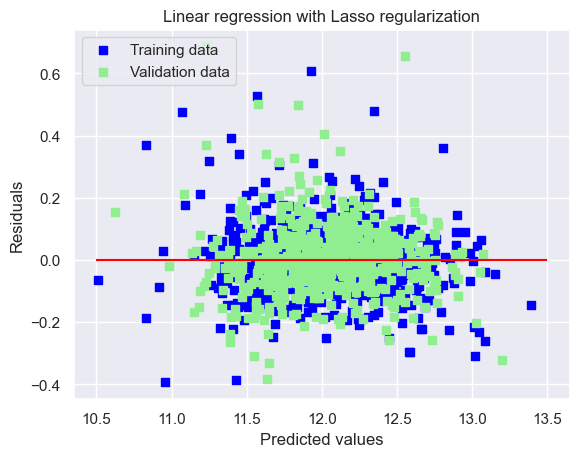

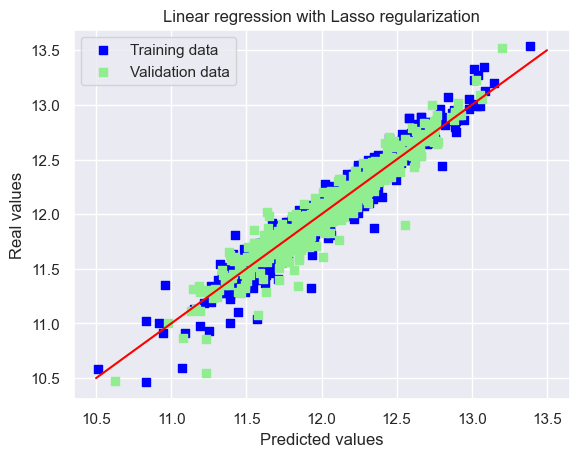

Lasso picked 92 features and eliminated the other 124 features


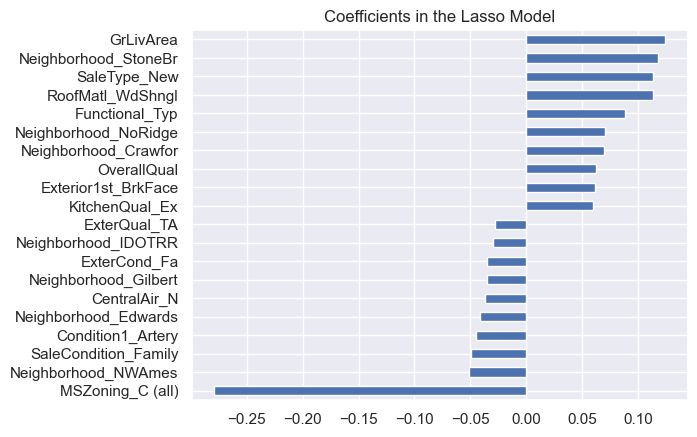

In [55]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

# Insights from Linear Regression with Lasso Regularization

In our analysis of house price prediction using Linear Regression with Lasso regularization (L1 penalty), we made several interesting observations:

1. **Improved RMSE Results:**
   - Both on the training and test sets, the Root Mean Squared Error (RMSE) improved compared to the non-regularized model.
   - Lasso effectively balances model complexity and generalization, leading to better performance.

2. **Feature Selection:**
   - Lasso used only approximately one-third of the available features.
   - This feature selection capability is valuable, especially when dealing with high-dimensional datasets.

3. **Neighborhood Categories:**
   - Lasso assigns significant weights to neighborhood categories.
   - Intuitively, this makes sense because house prices can vary significantly based on the neighborhood within the same city.
   - Positive and negative weights indicate how specific neighborhoods impact house prices.

4. **The "MSZoning_C (all)" Feature:**
   - The feature "MSZoning_C (all)" has a disproportionate impact compared to other features.
   - It is defined as the *general zoning classification: commercial*.
   - Surprisingly, having a house in a mostly commercial zone seems to be associated with lower prices.
   - Further investigation into this feature's influence could provide valuable insights.

In summary, Lasso regularization not only improves model performance but also provides interpretability through feature selection. Understanding the impact of specific features, such as neighborhood and zoning, can guide real estate decisions.

**4. Linear Regression with ElasticNet Regularization (L1 and L2 Penalty)**

ElasticNet regression strikes a balance between Ridge and Lasso regression techniques. It incorporates both L1 (Lasso) and L2 (Ridge) penalties to address specific limitations:

1. **Sparsity Generation**: The L1 penalty encourages sparsity by promoting feature selection. In other words, it helps identify the most relevant variables by shrinking some coefficients to zero.

2. **Overcoming Lasso Limitations**: Unlike Lasso, which cannot select more features than the number of observations (a constraint known as the "Lasso path"), ElasticNet does not face this limitation. Therefore, it can handle scenarios where the number of features exceeds the number of data points.

Best l1_ratio : 0.8
Best alpha : 0.0006
Try again for more precision with l1_ratio centered around 0.8
Best l1_ratio : 0.8
Best alpha : 0.0006
Now try again for more precision on alpha, with l1_ratio fixed at 0.8 and alpha centered around 0.0006
Best l1_ratio : 0.8
Best alpha : 0.0006
ElasticNet RMSE on Training set : 0.11690784137650949
ElasticNet RMSE on Test set : 0.11114607340569112


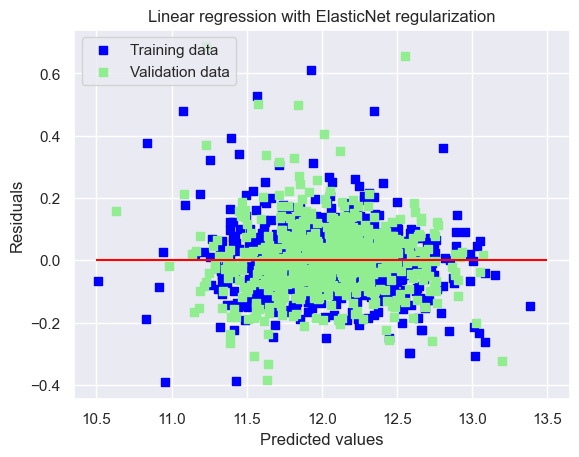

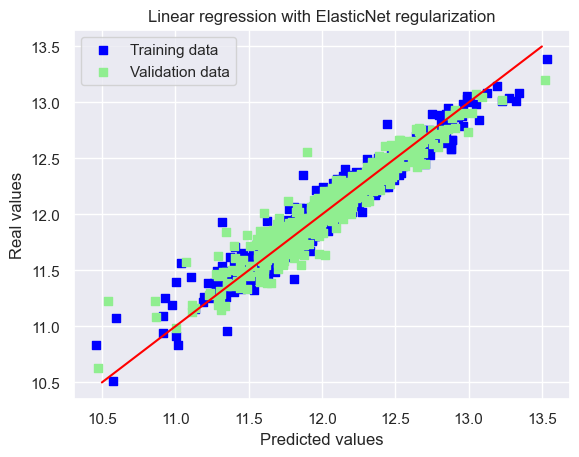

ElasticNet picked 94 features and eliminated the other 122 features


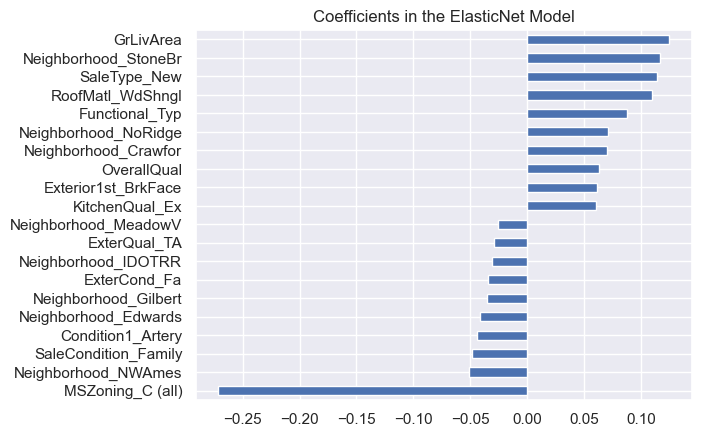

In [56]:
# 4* ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

## Conclusion: Predicting House Prices Using Linear Regression

In this project, we aimed to predict house prices using a linear regression model. Let's summarize our key steps and findings:

1. **Exploratory Data Analysis (EDA):**
    - We started by understanding our target variable, "SalePrice," which is crucial for our prediction task.
    - EDA involved analyzing other features individually and exploring their relationships with the target.
    - We identified potential outliers and missing values in the dataset.

2. **Data Preprocessing:**
    - To handle missing data, we dropped columns with null values.
    - We transformed skewed numerical features using a logarithmic transformation to reduce the impact of outliers.
    - For categorical data, we used one-hot encoding via `pd.get_dummies()` to convert them into a suitable format for modeling.

3. **Data Splitting and Scaling:**
    - We split our data into training and test sets.
    - Standard scaling was applied to both train and test data to ensure consistent feature scaling.

4. **Modeling:**
    - We initially trained a linear regression model without regularization.
    - However, this model suffered from overfitting due to high complexity.
    - To address this, we explored three regularization techniques:
        - **L2 (Ridge) Regularization:** Introduced a penalty term to the loss function to prevent overfitting.
        - **L1 (Lasso) Regularization:** Encouraged sparsity by shrinking some coefficients to zero.
        - **Elastic Net Regularization:** Combined L1 and L2 penalties for a balanced approach.
    - Our final model, with elastic net regularization, achieved good performance, as evidenced by a low root mean squared error (RMSE).

5. **Insights and Next Steps:**
    - Future work could involve exploring more advanced models, feature engineering, and incorporating domain-specific knowledge.
    - Continuously monitoring model performance and updating it with new data is essential.

In summary, our linear regression model provides a solid foundation for predicting house prices.🏠📈